In [3]:
import numpy as np 
import pandas as pd 


from scipy.stats import norm


import matplotlib.pyplot as plt


In [4]:
df = pd.read_csv('c:/users/arkaj/desktop/Uniqlo(FastRetailing) 2012-2016 Training - stocks2012-2016.csv')
df.head()

,Date,Open,High,Low,Close,Volume,Stock Trading
0,2016-12-30,42120,42330,41700,41830,610000,25628028000
1,2016-12-29,43000,43220,42540,42660,448400,19188227000
2,2016-12-28,43940,43970,43270,43270,339900,14780670000
3,2016-12-27,43140,43700,43140,43620,400100,17427993000
4,2016-12-26,43310,43660,43090,43340,358200,15547803000


In [5]:
df.isnull().sum()

Date             0
Open             0
High             0
Low              0
Close            0
Volume           0
Stock Trading    0
dtype: int64

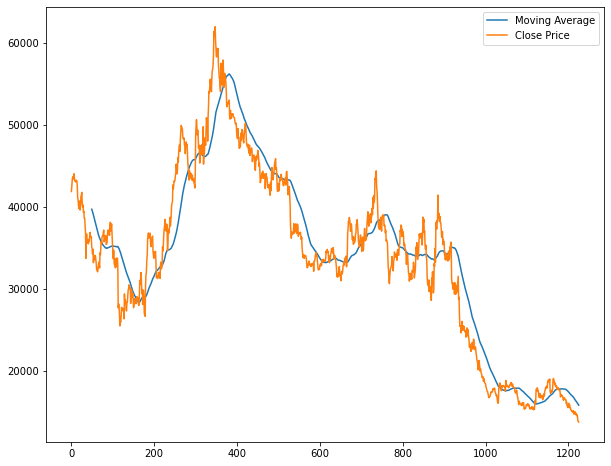

In [6]:
df['MA50'] = df['Close'].rolling(50).mean()
#plot the moving average
plt.figure(figsize=(10, 8))
df['MA50'].plot(label='Moving Average')
df['Close'].plot(label='Close Price')
plt.legend()
plt.show()

Text(0.5, 1.0, 'Price Return')

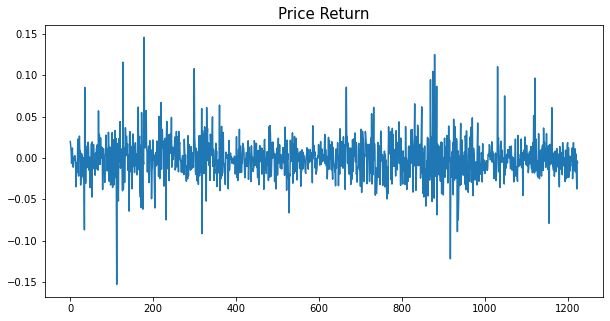

In [7]:
df['PriceDiff'] = df['Close'].shift(-1) - df['Close']
df['Return'] = df['PriceDiff'] /df['Close']
df['Return'].plot(figsize=(10,5))
plt.title('Price Return', size = 15)

Text(0.5, 1.0, 'Profit from Moving Stock')

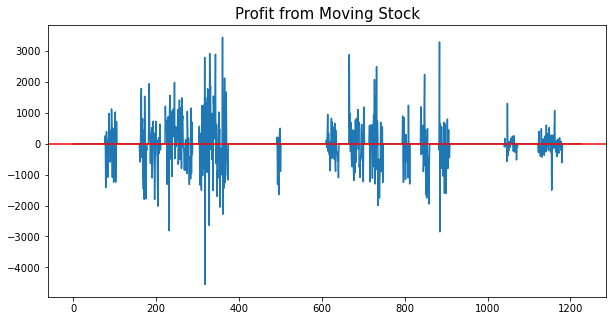

In [8]:
df['MA10'] = df['Close'].rolling(10).mean()
df['Shares'] = [1 if df.loc[ei, 'MA10']>df.loc[ei, 'MA50'] else 0 for ei in df.index]
df['Close1'] = df['Close'].shift(-1)
df['Profit'] = [df.loc[ei, 'Close1'] - df.loc[ei, 'Close'] if df.loc[ei, 'Shares']==1 else 0 for ei in df.index]
df['Profit'].plot(figsize=(10,5))
plt.axhline(y=0, color='red')
plt.title('Profit from Moving Stock', size = 15)

Text(0.5, 1.0, 'Total money you have made: -13945.0')

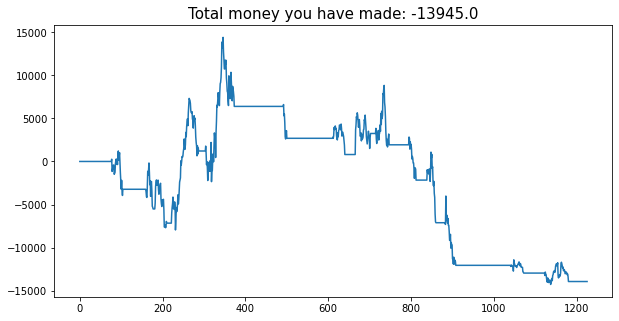

In [9]:
df['wealth'] = df['Profit'].cumsum()
df['wealth'].plot(figsize=(10,5))
plt.title('Total money you have made: {}'.format(df.loc[df.index[-2], 'wealth']), size = 15)

In [10]:
df['LogReturn'] = np.log(df['Close']).shift(-1) - np.log(df['Close'])
mu = df['LogReturn'].mean()
sigma = df['LogReturn'].std(ddof=1)
prob_return1 = norm.cdf(-0.10, mu, sigma)
print('The probability of dropping over 10% in one day ', prob_return1)

The probability of dropping over 10% in one day  1.8261732189977468e-05


In [11]:
mu220 = 365*mu
sigma220 = (365**0.5) * sigma
prob_return2 = norm.cdf(-0.10, mu220, sigma220)
print('The probability of dropping over 25% over a year: ', prob_return2)

The probability of dropping over 25% over a year:  0.6936669406211728


In [12]:
VaR = norm.ppf(0.05, mu, sigma)
print('Single day value at risk is: ', VaR)

Single day value at risk is:  -0.040389467411232324
